# Fall Problem Session 1

## Data Collection

The problems contained in this notebook relate to the concepts covered in the `Data Collection` lecture notebooks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

#### 1. Finding data online

##### a.

Go to Kaggle.com or the UC Irvine Machine Learning Repository and download a data set of your choice. Download then load that data set below using `pandas`. How many observations are in the data set?

In [27]:
import pandas as pd
import os

In [28]:
os.getcwd()

'/Users/danieltuthill/Documents/code-2022/Fall Problem Sessions'

In [33]:
wine = pd.read_csv(os.getcwd()+'/data/wine.data')

In [31]:
len(wine)

177

##### b.

Your boss would like to examine potential relationships between various company stock prices. They have assigned you the task of getting all of the historical stock data for `AAPL` and `GOOG`. 

For this task they would like:
- Each company to have their own `.csv` file containing the relevant stock data and
- The data to go back to the company's initial public offering (IPO), which is the first day the company started trading its stock publicly (for `AAPL` this was December 12, 1980 and for `GOOG` this was August 19, 2004).

<i>Hint: You can try competition sites, repositories or just doing a simple web search for such data.</i>

In [36]:
aapl = pd.read_csv(os.getcwd()+'/data/AAPL.csv')

In [37]:
goog = pd.read_csv(os.getcwd()+'/data/GOOG.csv')

#### 2. Scraping Sites with `BeautifulSoup`

You are interested in examining trends in Broadway revenue and attendance over the years. In this problem you will scrape data from <a href="https://www.playbill.com">https://www.playbill.com/grosses</a> on weekly grosses from Broadway shows.

##### a. 

First scrape the:
- Show title,
- Theatre name,
- Gross,
- Seats sold and
- Percentage of the cap

for all the shows found in the table at this link, <a href="https://www.playbill.com/grosses">https://www.playbill.com/grosses</a>.

In [44]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

In [3]:
url = 'https://www.playbill.com/grosses'

In [4]:
r = requests.get(url)

In [5]:
r.status_code

200

In [6]:
soup = BeautifulSoup(r.content,'html.parser')

In [15]:
shows = {
    'titles':[],
    'theatres':[],
    'gross':[],
    'seats':[],
    'perc':[],
}

In [16]:
for td in soup.find_all('td',{'data-label':'Show'}):
    shows['titles'].append(td.find('span', {'class':"data-value"}).text)
    shows['theatres'].append(td.find('span', {'class':"subtext"}).text)

In [17]:
for td in soup.find_all('td',{'data-label':'This Week Gross'}):
    shows['gross'].append(td.find('span', {'class':"data-value"}).text)

In [18]:
for td in soup.find_all('td',{'data-label':'Seats Sold'}):
    shows['seats'].append(td.find('span', {'class':"data-value"}).text)

In [19]:
for td in soup.find_all('td',{'data-label':'% Cap'}):
    shows['perc'].append(td.find('span', {'class':"data-value"}).text)

In [23]:
pd.DataFrame(shows)

,gross,perc,seats,theatres,titles
0,"$1,182,424.17",92.30%,"12,752",New Amsterdam Theatre,Aladdin
1,"$930,550.00",70.61%,"9,050",Marquis Theatre,Beetlejuice
2,"$1,038,905.40",97.21%,"8,290",Eugene O'Neill Theatre,The Book of Mormon
3,"$560,097.70",75.32%,"6,508",Ambassador Theatre,Chicago
4,"$674,986.47",88.04%,"7,367",Gerald Schoenfeld Theatre,Come From Away
5,"$1,068,823.00",101.03%,"7,953",Music Box Theatre,Dear Evan Hansen
6,"$659,874.30",79.00%,"7,704",August Wilson Theatre,Funny Girl
7,"$702,190.25",94.72%,"6,956",Walter Kerr Theatre,Hadestown
8,"$2,106,039.00",93.83%,"9,939",Richard Rodgers Theatre,Hamilton
9,"$1,432,270.70",86.92%,"11,279",Lyric Theatre,Harry Potter and the Cursed Child


##### b.

Notice that on <a href="https://www.playbill.com/grosses">https://www.playbill.com/grosses</a> there is an interactive button under the text "BROADWAY GROSSES WEEK ENDING" that allows the user to get grosses for any given week. What happens to the url when you select a different week?

?week=_ is added https://www.playbill.com/grosses?week=2022-08-28

In [ ]:
for td in soup.find_all('td',{'data-label':'Show'}):
    shows['titles'].append(td.find('span', {'class':"data-value"}).text)
    shows['theatres'].append(td.find('span', {'class':"subtext"}).text)

##### c.

Use `BeautifulSoup` to obtain all possible options for the week selector.

<i>Hint: the options are stored in a `select` object, you should be able to find out which portion of the HTML code you want to scrape with the web developer tools</i>

In [180]:
weeks = soup.find('select',{'name':'year'}).text.strip().splitlines()
print(weeks[:20])

['2022-09-04', '2022-08-28', '2022-08-21', '2022-08-14', '2022-08-07', '2022-07-31', '2022-07-24', '2022-07-17', '2022-07-10', '2022-07-03', '2022-06-26', '2022-06-19', '2022-06-12', '2022-06-05', '2022-05-29', '2022-05-22', '2022-05-15', '2022-05-08', '2022-05-01', '2022-04-24']


##### d. 

Write a script to record the data you scraped in <i>a.</i> for the 20 most recent weeks. Make sure to add in a small rest between each request you make to the website (You can do that with `time`'s `sleep` function, <a href="https://docs.python.org/3/library/time.html#time.sleep">https://docs.python.org/3/library/time.html#time.sleep</a>).

Your end result here should be a `DataFrame` that tracks the date along with all of the other information requested in <i>a.</i>

In [94]:
url = 'https://www.playbill.com/grosses'

weeks = soup.find('select',{'name':'year'}).text.strip().splitlines()

    shows = {
        'titles':[],
        'theatres':[],
        'gross':[],
        'seats':[],
        'perc':[],
        'week':[]
    }

for week in weeks[:20]:
    
    r = requests.get(url+'?week='+week)
    print(week,'status:',r.status_code)
    
    soup = BeautifulSoup(r.content,'html.parser')

    for td in soup.find_all('td',{'data-label':'Show'}):
        shows['titles'].append(td.find('span', {'class':"data-value"}).text)
        shows['theatres'].append(td.find('span', {'class':"subtext"}).text)

    for td in soup.find_all('td',{'data-label':'This Week Gross'}):
        shows['gross'].append(td.find('span', {'class':"data-value"}).text)

    for td in soup.find_all('td',{'data-label':'Seats Sold'}):
        shows['seats'].append(td.find('span', {'class':"data-value"}).text)

    for td in soup.find_all('td',{'data-label':'% Cap'}):
        shows['perc'].append(td.find('span', {'class':"data-value"}).text)
        shows['week'].append(week)
    
    time.sleep(3)

2022-09-04 status: 200
2022-08-28 status: 200
2022-08-21 status: 200
2022-08-14 status: 200
2022-08-07 status: 200
2022-07-31 status: 200
2022-07-24 status: 200
2022-07-17 status: 200
2022-07-10 status: 200
2022-07-03 status: 200
2022-06-26 status: 200
2022-06-19 status: 200
2022-06-12 status: 200
2022-06-05 status: 200
2022-05-29 status: 200
2022-05-22 status: 200
2022-05-15 status: 200
2022-05-08 status: 200
2022-05-01 status: 200
2022-04-24 status: 200


In [96]:
df = pd.DataFrame(shows)

##### e. 

Plot the total gross for each week against the date provided by <a href="https://www.playbill.com/grosses">https://www.playbill.com/grosses</a> for the data you just scraped. For example, if the total gross for the week of 2022-07-31 was 10,000,000 there should be a point on your plot at 2022-07-31 and 10,000,000.

In [177]:
sums = {}
for week in weeks[:20]:
    sums[week] = df.loc[df['week'] == week]['gross'].str.replace(',','').str.replace('$','').astype(float).sum()

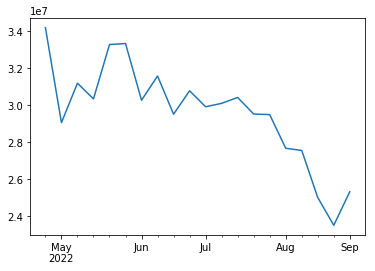

In [178]:
ds = pd.Series(sums)
ds.index = pd.to_datetime(ds.index,format='%Y-%m-%d')
ds.plot()

#### 3. Python and APIs

In this problem you will work through scraping ER episode ratings on IMDB using a Python wrapper for the IMDB API called `Cinemagoer` (formerly called `IMDBpy`). Here is a link to the documentation for this package, <a href="https://buildmedia.readthedocs.org/media/pdf/imdbpy/latest/imdbpy.pdf">https://buildmedia.readthedocs.org/media/pdf/imdbpy/latest/imdbpy.pdf</a>.

##### a.

Go to the documentation linked to above and look for installation instructions. Install the `Cinemagoer` package onto your machine, if you do not already have it installed. You can check that the package is installed by running the code chunks given below.

<i>Note, only one person in your group needs to have installed the package on their laptop in order to continue. Do not get hung up on the installation step during the problem session</i>.

In [181]:
import imdb

ModuleNotFoundError: No module named 'imdb'

In [ ]:
print(imdb.__version__)

##### b.

Creating a `Cinemagoer` object is what allows us to request data from IMDB. Use the Example at the start of chapter 3 of the documentation (page 7) to learn how to create a `Cinemagoer` object.

##### c.

In order to get rating information from each episode of "ER" we need its unique identifier, its `Movie id`.

We can find that using the `search_movie` function of the `Cinemagoer` class.

Search the documentation for how to use `search_movie` to search for `"ER" (1994)` using the search term `'simpsons'`. A `list` should be returned. When you find the entry that corresponds to `"ER" (1994)` store a string of the id in a variable called `show_id`.

##### d.

Search the documentation for `get_movie` to see how we can get "ER" result using the `show_id` that we found in the last problem. Store the result in a variable called `ER`.

##### e. 

Search the documentation for `update(series, 'episodes')` to see how to return the IMDB data for each episode and have it stored in your `ER` variable.

<i>Note: Do not worry if this seems to take a long time, because "ER" had a lot of episodes meaning a lot of calls have to be made to the API.</i>

##### f.

What is kind of Python object is returned when you run `ER['episodes']`?

##### g.

Look at the `keys` for an episode of your choice using `.keys()`, which one seems to contain the IMDB rating?

##### h.

Write some python code to store each episode's rating in a list.

##### i.

Use `matplotlib` to plot the ratings over time to see how reception of the show has changed.

In [ ]:
## Fill in the missing code
plt.figure(figsize=(12,8))

plt.scatter()

plt.xlabel()
plt.ylabel()


plt.show()

#### 4. Slightly more advanced `BeautifulSoup`

This is a problem that will introduce a new scraping technique that you may need to use in your future quests for data.

Your job is to scrape the player names and `BadPass` `LostBall` columns of the "Play-by-Play" table at this link, <a href=""https://www.basketball-reference.com/teams/CHI/1998.html"">"https://www.basketball-reference.com/teams/CHI/1998.html"</a>.

##### a.

First go to this link and examine the table in question so you know what you want to scrape.

##### b.

Make a `BeautifulSoup` object of that link's source code.

##### c.

Try to use the `find` function to get the code for the "Play-by-Play" table. What happens?

##### d.

`BeautifulSoup` is unable to find the specified table. This is because it is stored as an HTML comment. So we have to search the comments to get the table we want, this is because the table is stored in a comment within the source code.

To do so we will use `bs4`'s `Comment` object. Try to follow what is found in this stack post, <a href="https://stackoverflow.com/questions/33138937/how-to-find-all-comments-with-beautiful-soup">https://stackoverflow.com/questions/33138937/how-to-find-all-comments-with-beautiful-soup</a>.

In [ ]:
## Import Comment
from bs4 import Comment

##### e.

Once you have found the comment that contains the table we want you have to turn that comment into a `BeautifulSoup` object. Do so now.

##### f.

Now scrape the desired data and store it in a `pandas` `DataFrame`.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)